In [3]:
import numpy as np
import matplotlib as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
path = './data/train/bee/'
name = '20997149292_3b5fd09795_m.jpg'
fullname = f'{path}/{name}'


img = load_img(fullname, target_size = (299,299))




In [7]:
x= np.array(img)

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions



In [9]:
model = Xception(weights= 'imagenet', input_shape = (299,299,3))

2023-11-19 11:35:15.783540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 11:35:15.789322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 11:35:15.789883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 11:35:15.790732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [10]:
X = np.array([x])

In [11]:
X= preprocess_input(X)

In [12]:
pred = model.predict(X)

2023-11-19 11:35:19.327011: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-19 11:35:19.963574: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 11:35:19.964071: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 11:35:19.964124: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-19 11:35:19.964774: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 11:35:19.964872: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [13]:
decode_predictions(pred)

[[('n02206856', 'bee', 0.9817046),
  ('n02190166', 'fly', 0.006096769),
  ('n07730033', 'cardoon', 0.0020073904),
  ('n11879895', 'rapeseed', 0.00046862604),
  ('n02727426', 'apiary', 0.00039665506)]]

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_get = ImageDataGenerator(preprocessing_function = preprocess_input )

train_ds = train_get.flow_from_directory('./data/train/',
                              target_size = (150,150),
                              batch_size = 32)

Found 3677 images belonging to 2 classes.


In [16]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [17]:
X, y = next(train_ds)

In [18]:
X.shape

(32, 150, 150, 3)

In [19]:
test_get = ImageDataGenerator(preprocessing_function = preprocess_input )

test_ds = train_get.flow_from_directory('./data/test/',
                              target_size = (150,150),
                              batch_size = 32, shuffle = False)

Found 918 images belonging to 2 classes.


In [84]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

In [ ]:
base_model = Sequential(weights = 'imagenet', 
                      include_top = False, 
                     input_shape = (150,150,3)
                     )


base_model.trainable = False


inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model =keras.Model(inputs, outputs)


In [21]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [22]:
preds.shape

(32, 2)

In [23]:
preds[0]

array([-0.0852978, -0.2805415], dtype=float32)

In [24]:

learning_rate = 0.01
optimizer  = keras.optimizers.Adam(learning_rate = learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits= True)



model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, 
          epochs=10, 
          validation_data = test_ds)

Epoch 1/10
 16/115 [===>..........................] - ETA: 7s - loss: 0.9981 - accuracy: 0.7793

KeyboardInterrupt: 

In [26]:
import matplotlib.pyplot as plt 

In [27]:
plt.plot(history.history['accuracy'], label = 'train')

plt.plot(history.history['val_accuracy'], label = 'test')
#plt.xtick(np.arange(10))
plt.legend()


NameError: name 'history' is not defined

In [28]:
#adjust learning rate

In [29]:
def make_model(learning_rate = 0.01):
    base_model = Xception(weights = 'imagenet', 
                          include_top = False, 
                         input_shape = (150,150,3)
                         )


    base_model.trainable = False


    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    ###########
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    outputs = keras.layers.Dense(2)(vectors)

    model =keras.Model(inputs, outputs)
    
    ###############
    
    optimizer  = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits= True)



    model.compile(optimizer=optimizer,
                  loss=loss,
              metrics=['accuracy'])
    return model

In [ ]:
scores = {}
for lr in [0.0001,0.001, 0.01,0.1]:    
    print(lr)
    model = make_model(learning_rate =lr)
    history = model.fit(train_ds, 
              epochs=10, 
              validation_data = test_ds)
    scores[lr]=history.history
    
    print()
    print(lr)

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = lr)
    #plt.xtick(np.arange(10))
    plt.legend()

In [ ]:

for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
    #plt.xtick(np.arange(10))
    plt.legend()


In [30]:
learning_rate = 0.001

In [31]:
#checkpoints

In [32]:
model.save_weights('model_v1.h5', save_format = 'h5')
                   

In [33]:
('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5').format(epoch=3, val_accuracy = 0.84)



'xception_v1_03_0.840.h5'

In [34]:



checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'


)



In [35]:
learning_rate = 0.001

history = model.fit(train_ds, 
              epochs=10, 
              validation_data = test_ds,
                   callbacks = [checkpoint])

Epoch 1/10
 21/115 [====>.........................] - ETA: 6s - loss: 0.4196 - accuracy: 0.8571

KeyboardInterrupt: 

In [ ]:
#adding more layers

In [36]:
def make_model(learning_rate = 0.01, size_inner = 1000):
    base_model = Xception(weights = 'imagenet', 
                          include_top = False, 
                         input_shape = (150,150,3)
                         )


    base_model.trainable = False


    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    ###########
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    
    
    
    
    outputs = keras.layers.Dense(2, activation = 'softmax')(inner)

    model = keras.Model(inputs, outputs)
    
    ###############
    
    optimizer  = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits= True)

    model.compile(optimizer=optimizer,
                  loss=loss,
              metrics=['accuracy'])
    return model

In [ ]:
scores = {}
for si in [10,100, 1000]:    
    print(si)
    model = make_model(learning_rate = 0.001, size_inner = si)
    history = model.fit(train_ds, 
              epochs=10, 
              validation_data = test_ds,)
    scores[si]=history.history
    
    print()
    print()

In [ ]:

for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = lr)
    #plt.xtick(np.arange(10))
    plt.legend()


In [ ]:

for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
    #plt.xtick(np.arange(10))
    plt.legend()


In [ ]:
#regularization

In [37]:
def make_model(learning_rate = 0.01, size_inner = 1000,dropout_rate= 0.8):
    base_model = Xception(weights = 'imagenet', 
                          include_top = False, 
                         input_shape = (150,150,3)
                         )


    base_model.trainable = False


    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    ###########
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    
    drop = keras.layers.Dropout(dropout_rate)(inner)
    
    outputs = keras.layers.Dense(2, activation = 'softmax')(drop)

    model = keras.Model(inputs, outputs)
    
    ###############
    
    optimizer  = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits= True)

    model.compile(optimizer=optimizer,
                  loss=loss,
              metrics=['accuracy'])
    return model

In [ ]:
scores = {}
for dr in [0.0,0.2,0.5,0.8]:    
    print(dr)
    model = make_model(learning_rate = 0.001, size_inner = 1000, dropout_rate = dr)
    history = model.fit(train_ds, 
              epochs=30, 
              validation_data = test_ds,)
    scores[dr]=history.history
    
    print()
    print()

In [ ]:

for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
    plt.xlim( )
    plt.legend()


In [39]:
train_imgs_dir = './data/train/'

In [45]:
input_size = 299

In [46]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(input_size,input_size),
                                         batch_size=32)


test_get = ImageDataGenerator(preprocessing_function = preprocess_input )

test_ds = train_get.flow_from_directory('./data/test/',
                              target_size = (input_size,input_size),
                              batch_size = 32, shuffle = False)

Found 3677 images belonging to 2 classes.


Found 918 images belonging to 2 classes.


In [44]:
model = make_model(learning_rate = 0.01,
                   size_inner = 1000,
                   dropout_rate= 0.8)
    
    
history = model.fit(train_ds, 
              epochs=50, 
              validation_data = test_ds,)
    

Epoch 1/50


/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


115/115 [==============================] - 29s 234ms/step - loss: 2.9196 - accuracy: 0.7873 - val_loss: 0.2373 - val_accuracy: 0.8965
Epoch 2/50
115/115 [==============================] - 23s 199ms/step - loss: 0.4301 - accuracy: 0.8346 - val_loss: 0.2343 - val_accuracy: 0.9031
Epoch 3/50
115/115 [==============================] - 23s 199ms/step - loss: 0.4020 - accuracy: 0.8363 - val_loss: 0.2291 - val_accuracy: 0.8998
Epoch 4/50
115/115 [==============================] - 23s 199ms/step - loss: 0.3966 - accuracy: 0.8306 - val_loss: 0.2267 - val_accuracy: 0.9085
Epoch 5/50
115/115 [==============================] - 23s 199ms/step - loss: 0.4425 - accuracy: 0.8153 - val_loss: 0.2363 - val_accuracy: 0.9031
Epoch 6/50
115/115 [==============================] - 23s 200ms/step - loss: 0.4039 - accuracy: 0.8243 - val_loss: 0.2341 - val_accuracy: 0.9107
Epoch 7/50
115/115 [==============================] - 23s 198ms/step - loss: 0.4447 - accuracy: 0.8200 - val_loss: 0.2131 - val_accuracy: 0.9

KeyboardInterrupt: 

In [48]:
plt.plot(history.history['accuracy'], label = 'train')

plt.plot(history.history['val_accuracy'], label = 'test')
#plt.xtick(np.arange(10))
plt.legend()


NameError: name 'history' is not defined

In [49]:
# large datasets

In [53]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(input_size,input_size),
                                         batch_size=32)


test_get = ImageDataGenerator(preprocessing_function = preprocess_input )

test_ds = train_get.flow_from_directory('./data/test/',
                              target_size = (input_size,input_size),
                              batch_size = 32, shuffle = False)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [54]:
def make_model(learning_rate = 0.01, size_inner = 1000,dropout_rate= 0.8, input_size = 299):
    base_model = Xception(weights = 'imagenet', 
                          include_top = False, 
                         input_shape = (input_size,input_size,3)
                         )


    base_model.trainable = False


    inputs = keras.Input(shape=(input_size,input_size,3))

    base = base_model(inputs, training=False)

    ###########
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    
    drop = keras.layers.Dropout(dropout_rate)(inner)
    
    outputs = keras.layers.Dense(2, activation = 'softmax')(drop)

    model = keras.Model(inputs, outputs)
    
    ###############
    
    optimizer  = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits= True)

    model.compile(optimizer=optimizer,
                  loss=loss,
              metrics=['accuracy'])
    return model

In [55]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'


)

In [56]:
learning_rate = 0.01
size_inner = 1000
dropout_rate= 0.8
input_size = 299


model = make_model(learning_rate = learning_rate,
                   size_inner = size_inner,
                   dropout_rate= dropout_rate,
                  input_size = input_size)
    
    
history = model.fit(train_ds, 
              epochs=50, 
              validation_data = test_ds,
                   callbacks = [checkpoint])
    

Epoch 1/50
115/115 [==============================] - 75s 634ms/step - loss: 1.0556 - accuracy: 0.8605 - val_loss: 0.1641 - val_accuracy: 0.9423
Epoch 2/50
115/115 [==============================] - 73s 632ms/step - loss: 0.2774 - accuracy: 0.9070 - val_loss: 0.1713 - val_accuracy: 0.9477
Epoch 3/50
115/115 [==============================] - 73s 631ms/step - loss: 0.2582 - accuracy: 0.9092 - val_loss: 0.1424 - val_accuracy: 0.9542
Epoch 4/50
115/115 [==============================] - 72s 628ms/step - loss: 0.2761 - accuracy: 0.9007 - val_loss: 0.1503 - val_accuracy: 0.9521
Epoch 5/50
115/115 [==============================] - 72s 628ms/step - loss: 0.2884 - accuracy: 0.8948 - val_loss: 0.1545 - val_accuracy: 0.9521
Epoch 6/50
115/115 [==============================] - ETA: 0s - loss: 0.3171 - accuracy: 0.8820

KeyboardInterrupt: 

In [ ]:
# using model

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input



In [67]:
model = keras.models.load_model('xception_v4_03_0.954.h5')
                       
                       
                       

In [68]:
test_get = ImageDataGenerator(preprocessing_function = preprocess_input )

test_ds = train_get.flow_from_directory('./data/test/',
                              target_size = (input_size,input_size),
                              batch_size = 32, shuffle = False)

Found 918 images belonging to 2 classes.


In [69]:
model.evaluate(test_ds)

29/29 [==============================] - 7s 210ms/step - loss: 0.1424 - accuracy: 0.9542


[0.1424315869808197, 0.9542483687400818]

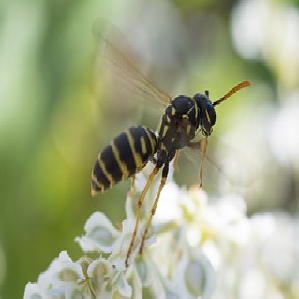

In [73]:
path = './data/test/wasp/'
name = '20637300636_d3b5b6524b_n.jpg'
fullname = f'{path}/{name}'


img = load_img(fullname, target_size = (299,299))
img



In [74]:
x = np.array(img)
X = np.array([x])

In [77]:
X = preprocess_input(X)

In [78]:
pred = model.predict(X)

1/1 [==============================] - 1s 623ms/step


In [81]:
train_ds.class_indices


{'bee': 0, 'wasp': 1}

In [82]:
classes = ['bee', 'wasp']

In [83]:
dict(zip(classes, pred[0]))

{'bee': 0.07360528, 'wasp': 0.9263947}

In [ ]:
#summary